In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)

            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img, (196, 196))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [3]:
image_train_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\train')
image_test_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test')

In [4]:
len(image_train_set)

12900

In [5]:
len(image_test_set)

1950

In [6]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [10]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
#test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [11]:
test_images_array.shape

(1950, 196, 196)

In [8]:
train_images_array.shape

(12900, 196, 196)

In [9]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(12900, 196*196))
train_images_array = train_images.reshape(12900, 196, 196, 1)

In [12]:
test_image = scalar.fit_transform(test_images_array.reshape(1950,196*196))
test_image_array = test_image.reshape(1950,196,196,1)

In [13]:
train_image_label.shape

(12900,)

In [14]:
test_image_label.shape

(1950,)

In [15]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [16]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [17]:
val_x.shape

(2580, 196, 196, 1)

In [18]:
train_y.shape

(10320,)

In [22]:
model = Sequential()
model.add(Conv2D(input_shape=(196,196,1),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(512, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', name='fc2'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax', name='output'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(0.001),
               metrics=['accuracy'])

model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=15, min_lr=0.00001)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 196, 196, 32)      320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 196, 196, 64)      18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 196, 196, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 98, 98, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 98, 98, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 98, 98, 128)      

In [23]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=64, epochs=50, verbose=1,shuffle=True, callbacks = [reduce_lr])

Train on 10320 samples, validate on 2580 samples
Epoch 1/50
10320/10320 [==============================] - 66s 6ms/sample - loss: 1.2340 - accuracy: 0.5578 - val_loss: 2.2203 - val_accuracy: 0.3198
Epoch 2/50
10320/10320 [==============================] - 60s 6ms/sample - loss: 0.3504 - accuracy: 0.8854 - val_loss: 2.1985 - val_accuracy: 0.3264
Epoch 3/50
10320/10320 [==============================] - 60s 6ms/sample - loss: 0.1518 - accuracy: 0.9524 - val_loss: 0.8603 - val_accuracy: 0.6267
Epoch 4/50
10320/10320 [==============================] - 61s 6ms/sample - loss: 0.1125 - accuracy: 0.9628 - val_loss: 0.0793 - val_accuracy: 0.9752
Epoch 5/50
10320/10320 [==============================] - 61s 6ms/sample - loss: 0.0895 - accuracy: 0.9674 - val_loss: 0.0546 - val_accuracy: 0.9709
Epoch 6/50
10320/10320 [==============================] - 61s 6ms/sample - loss: 0.0703 - accuracy: 0.9732 - val_loss: 0.0496 - val_accuracy: 0.9725
Epoch 7/50
10320/10320 [==============================] -

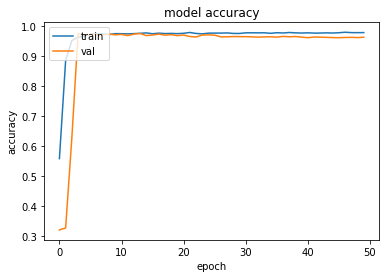

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

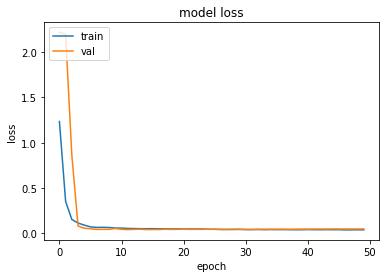

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
y_predict = model.predict(test_image_array)

In [40]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [53]:
from sklearn.metrics import confusion_matrix,precision_score,auc,recall_score,roc_curve,precision_recall_curve

In [42]:
confusion_matrix(test_image_label,y_predict_bool)

array([[  0, 137,  13,   0,   0,   0],
       [ 19, 258, 313,   9,   0,   1],
       [  0, 125, 310, 104,   0,  61],
       [  0, 137,   0,   0,   0,  13],
       [  0,  13, 137,   0,   0,   0],
       [  0, 150, 126,  10,  12,   2]], dtype=int64)

In [44]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.20690730631857632

In [52]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=2)
print(auc(fpr,tpr))

0.7121104938271605


In [31]:
score = model.evaluate(test_image_array,test_label_enc)

1950/1950 [==============================] - 3s 2ms/sample - loss: 3.4898 - accuracy: 0.2923


In [57]:
(2)/(150+126+10+12+2)

0.006666666666666667

In [3]:
150+126+10+12+2

300